In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Downside risk 2.csv')
df[ 'Dates' ] = pd.to_datetime(df['Dates'])
df.head()

,Dates,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
2,2010-06-30,1872.392242,1021.367779,435.603736,161.737488,207.941710,3947.680216,758.489288
3,2010-09-30,1814.935858,1002.774108,394.270985,239.432549,207.260021,4001.885352,753.091203
4,2010-12-31,1924.090606,1020.091130,444.896280,261.336257,222.132551,4277.169580,639.829244


In [3]:
df1 = df.set_index('Dates').resample('1m').mean()
#df.set_index(["Dates", "Revenue"], inplace = True,append = True, drop = False).resample('1m').mean()
#df.set_index(["Dates"], inplace = True).resample('1m').mean()
df1

,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
Dates,,,,,,,
2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#df1[df1['D REVENUE'].isna()]

In [5]:
#df1['Revenue'].interpolate('linear').plot()
#pd.DataFrame(df['Revenue'], index=df['Date']).interpolate(method='time')

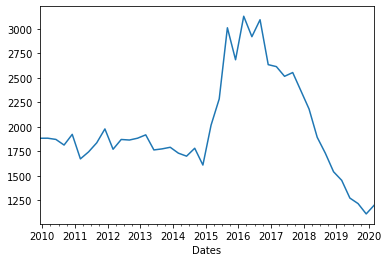

In [16]:
df1['D REVENUE'].interpolate('linear').plot()

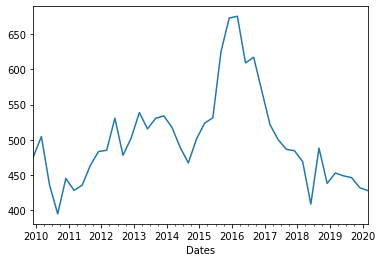

In [7]:
df1['D OE'].interpolate('linear').plot()

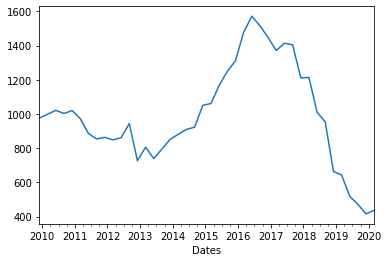

In [8]:
df1['U CR'].interpolate('linear').plot()

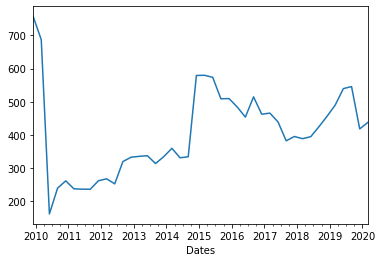

In [9]:
df1['D NOI'].interpolate('linear').plot()

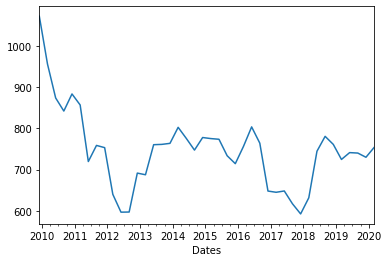

In [10]:
df1['D FCF'].interpolate('linear').plot()

In [4]:
df1['D REVENUE'] = df1['D REVENUE'].interpolate('linear')
df1['U CR'] = df1['U CR'].interpolate('linear')
df1['D OE'] = df1['D OE'].interpolate('linear')
df1['D NOI'] = df1['D NOI'].interpolate('linear')
df1['U CAPEX'] = df1['U CAPEX'].interpolate('linear')
df1['U CWK'] = df1['U CWK'].interpolate('linear')
df1['D FCF'] = df1['D FCF'].interpolate('linear')

In [5]:
df1.info

<bound method DataFrame.info of               D REVENUE         U CR        D OE       D NOI     U CAPEX  \
Dates                                                                      
2009-12-31  1884.372544   976.202014  475.249997  757.519678  207.477947   
2010-01-31  1884.566826   983.762225  485.004015  734.017979  207.303532   
2010-02-28  1884.761107   991.322435  494.758033  710.516281  207.129117   
2010-03-31  1884.955389   998.882646  504.512051  687.014582  206.954702   
2010-04-30  1880.767673  1006.377690  481.542613  511.922217  207.283705   
...                 ...          ...         ...         ...         ...   
2018-08-31  1785.193900   972.274049  461.469501  414.377788   98.125058   
2018-09-30  1730.706270   953.165883  488.056175  424.307526   95.323030   
2018-10-31  1667.921494   856.900384  471.261535  434.874583   92.144220   
2018-11-30  1605.136718   760.634885  454.466895  445.441639   88.965411   
2018-12-31  1542.351942   664.369385  437.672255  456.00

In [6]:
df1.to_csv("InterpolatedWithCAPEX2.csv")

In [7]:
den = pd.read_csv("InterpolatedWithCAPEX2.csv")

In [8]:
den.info

<bound method DataFrame.info of           Dates    D REVENUE         U CR        D OE       D NOI     U CAPEX  \
0    2009-12-31  1884.372544   976.202014  475.249997  757.519678  207.477947   
1    2010-01-31  1884.566826   983.762225  485.004015  734.017979  207.303532   
2    2010-02-28  1884.761107   991.322435  494.758033  710.516281  207.129117   
3    2010-03-31  1884.955389   998.882646  504.512051  687.014582  206.954702   
4    2010-04-30  1880.767673  1006.377690  481.542613  511.922217  207.283705   
..          ...          ...          ...         ...         ...         ...   
104  2018-08-31  1785.193900   972.274049  461.469501  414.377788   98.125058   
105  2018-09-30  1730.706270   953.165883  488.056175  424.307526   95.323030   
106  2018-10-31  1667.921494   856.900384  471.261535  434.874583   92.144220   
107  2018-11-30  1605.136718   760.634885  454.466895  445.441639   88.965411   
108  2018-12-31  1542.351942   664.369385  437.672255  456.008696   85.786601